# I. Introduction

=================================================

Graded Challenge 7

Nama  : Pujo Prasetyo Aji

Email : pujo.prasetyoaji@gmail.com

=================================================

**Problem Background :** \
Go-Jek merupakan salah satu penyedia layanan transportasi online terpopuler di Indonesia.
Gojek menyediakan berbagai layanan lengkap mulai dari transportasi, logistik, pembayaran, layanan pesan-antar makanan, dan berbagai layanan lainnya.
Dibandingkan dengan layanan sejenis dari kompetitor, Go-Jek masih menjadi on-demand mobile platform yang paling diminati di Indonesia.

Untuk dapat mempertahankan layanan terbaik kepada konsumen, Go-Jek harus mampu meningkatkan layanan dalam berbagai aspek terutama terkait dengan kepuasan pelanggan.
Salah satu cara untuk mengetahui tingkat kepuasan pelanggan yaitu dengan melihat reviews aplikasi GoJek yang ada di Google Play Store.
Reviews yang baik akan meningkatkan rating aplikasi sehingga dapat menambah pelanggan baru dan menjaga stabilitas perusahaan. Sedangkan rating yang buruk dapat mempengaruhi pengguna untuk beralih ke kompetitor lain.

**Objective :** \
Project ini bertujuan untuk membuat sebuah model machine learning yang dapat menentukan apakah sebuah teks (reviews) bersentiment positif atau negatif. \
Kemudian memberikan rekomendasi kepada perusahaan Go-Jek mengenai strategi bisnis yang dapat digunakan berdasarkan hasil analisis data dan sentimen pelanggan.

**Method :** \
Algoritma machine learning yang digunakan adalah Artificial Neural Network (ANN) sebagai model klasifikasi. \
Metrics evaluasi yang digunakan antara lain histogram untuk melihat performa model, confusion matrix untuk melihat hasil prediksi benar & salah, dan f1 score untuk melihat performa model dalam mendeteksi False Positive (FP) dan False Negative (FN)


**Dataset :** \
Dataset diambil dari kaggle dengan judul 'gojek app reviews bahasa indonesia'. Dataset berisi review user terhadap aplikasi gojek yang diambil dari google-play dari tahun 2021 hingga 2024.
Dataset terdiri dari 5 kolom dan 200.000+ baris data.

Hasil model deployment dapat diakses pada link berikut: \
https://huggingface.co/spaces/prasetyoaji/Sentiment_Analysis_Gojek

Dataset dapat diakses pada link berikut: \
https://www.kaggle.com/datasets/ucupsedaya/gojek-app-reviews-bahasa-indonesia

=================================================


# II. Import Library

Pada tahap ini dilakukan penambahan library yang diperlukan untuk proses pengolahan data dan pemodelan machine learning

In [4]:
!pip install -q --upgrade "tensorflow<2.16" "tf-keras<2.16"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 122.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tenso

In [5]:
!pip install gensim pysastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires tf-keras>=2.18.0, but you have tf-keras 2.15.1 which is incompatible.
jax 0.5.2 requires ml_dtypes>=0.4.0, but you have ml-dtypes 0.3.2 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


In [1]:
!wget https://github.com/pujoprasetyo/NLP-Resource/raw/main/GojekAppReview.zip

--2025-06-29 21:43:53--  https://github.com/pujoprasetyo/NLP-Resource/raw/main/GojekAppReview.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pujoprasetyo/NLP-Resource/main/GojekAppReview.zip [following]
--2025-06-29 21:43:53--  https://raw.githubusercontent.com/pujoprasetyo/NLP-Resource/main/GojekAppReview.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8094177 (7.7M) [application/zip]
Saving to: ‘GojekAppReview.zip’

GojekAppReview.zip  100%[===================>]   7.72M  --.-KB/s    in 0.08s   

2025-06-29 21:43:54 (95.3 MB/s) - ‘GojekAppReview.zip’ saved [8094177/8094177]



In [2]:
!wget https://raw.githubusercontent.com/pujoprasetyo/NLP-Resource/main/slangwords.txt

--2025-06-29 21:43:54--  https://raw.githubusercontent.com/pujoprasetyo/NLP-Resource/main/slangwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21525 (21K) [text/plain]
Saving to: ‘slangwords.txt’

slangwords.txt      100%[===================>]  21.02K  --.-KB/s    in 0.001s  

2025-06-29 21:43:54 (14.1 MB/s) - ‘slangwords.txt’ saved [21525/21525]



In [117]:
# Import Libraries
# Data processing
import re
import nltk
import string
import json
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay, confusion_matrix

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from gensim.models import Word2Vec

nltk.download('stopwords')
nltk.download('punkt_tab')

# Tensorflow
import tensorflow as tf
import tensorflow_hub as tf_hub
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, Reshape
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# III. Data Loading

Tahap data loading adalah tahapan untuk mempersiapkan data. Pada tahap ini dilakukan proses eksplorasi dan pengolahan data dasar untuk melihat karakteristik data menentukan tahapan pengolahan data yang akan dilakukan.

In [2]:
# Ekstrak data zip
with zipfile.ZipFile('GojekAppReview.zip', 'r') as zip_data:
    zip_data.extractall('.')

In [3]:
# Load file csv
df = pd.read_csv('GojekAppReview.csv')
df

,userName,content,score,at,appVersion
0,Yuga Edit,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3
1,ff burik,Lambat sekali sekarang ini bosssku apk gojek g...,3,2021-11-30 15:40:38,4.9.3
2,Anisa Suci Rahmayuliani,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,2021-11-29 22:58:12,4.9.3
3,naoki yakuza,Baru download gojek dan hape baru trus ditop u...,1,2022-09-03 15:21:17,4.9.3
4,Trio Sugianto,Mantap,5,2022-01-15 10:05:27,4.9.3
...,...,...,...,...,...
224997,Sad Gamer,Gofood Biaya lain2ya gak ngotak mending hujan2...,1,2023-02-15 09:37:58,4.0.0
224998,fadhil fadil,Yok lah,5,2021-12-11 12:28:20,4.0.0
224999,g sugiarto,Sempurna,5,2022-03-14 01:45:39,4.0.0
225000,J i H A D 'B E,GOJEK LAMA LAMA GAK JELAS LAGI PESEN MASA MAP...,1,2021-12-24 08:48:51,4.0.0


Dataset yang digunakan berisi data reviews pelanggan gojek yang tersusun dalam 5 kolom. Kolom data berisi informasi berupa nama, konten reviews, score, tanggal, dan versi aplikasi yang digunakan. Jumlah data yang terdapat dalam dataset yaitu 225.002 baris data.

Karena objective yang ingin dicapai adalah mengetahui sentimen konsumen terhadap produk Gojek, maka data yang digunakan dibatasi pada reviews yang berasal dari satu tahun terakhir(2024). Hal ini dilakukan untuk memastikan bahwa data yang dianalisis bersifat relevan dan mencerminkan persepsi konsumen terkini terhadap layanan yang diberikan.

In [4]:
# Mengambil data dari tahun 2024
data =df[df['at']>'2024-01-01']
data

,userName,content,score,at,appVersion
21,Hanifa Nabila L,Sekarang go food ngga pernah ada promo ongkirn...,3,2024-01-21 08:33:28,4.9.3
133,Abu karim aljabbar Mkatiksaidi,Ramah banget,5,2024-02-01 08:57:09,4.82.1
134,Fathan Mubina,Setelah update kok nggak bisa dibuka,4,2024-01-31 15:20:04,4.82.1
135,Nyauw Jin Fie,Good,5,2024-02-01 12:51:53,4.82.1
136,Tanaka Kun,Good,5,2024-02-01 04:58:30,4.82.1
...,...,...,...,...,...
224615,Pengguna Google,Lagilagi kenapa paylater ngak bisa lagi dipaka...,5,2024-01-03 07:31:12,4.10.3
224811,Budi family,kenapa map goride setiap dekat tol pasti di ar...,1,2024-01-07 15:40:43,4.10.3
224852,Musadul Wifaq,Makanan keburu dingin karena terlalu lama menu...,1,2024-01-30 11:05:38,4.10.3
224906,syed abdullah almunawwar,Maksa banget suruh download ssih,1,2024-01-18 15:06:07,4.1.1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6824 entries, 21 to 224911
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   userName    6824 non-null   object
 1   content     6824 non-null   object
 2   score       6824 non-null   int64 
 3   at          6824 non-null   object
 4   appVersion  6824 non-null   object
dtypes: int64(1), object(4)
memory usage: 577.9+ KB


In [6]:
data.duplicated().sum()

0

Setelah dilakukan proses sorting berdasarkan tahun, jumlah data yang diperoleh yaitu 6824 baris data. Tidak terlihat adanya missing value atau duplikasi pada data tersebut.


Selanjutnya dilakukan proses labeling untuk memisahkan data yang terindikasi reviews positif dan reviews negatif. Label dibagi menjadi dua kelas data agar memudahkan model untuk mendeteksi data yang menyatakan kepuasan atau ketidak puasan pelanggan.

Proses labeling dilakukan berdasarkan nilai score yang ada pada reviews, dimana skor 1-3 akan masuk dalam kelas negatif dan skor 4-5 menjadi kelas positif. Nilai 3 dimasukkan ke dalam sentiment negatif dikarenakan setelah dilakukan analisis, reviews dengan nilai 3 cenderung memiliki pernyataan negatif.



In [7]:
# Contoh reviews data dengan skor 3
data[data['score']==3]

,userName,content,score,at,appVersion
21,Hanifa Nabila L,Sekarang go food ngga pernah ada promo ongkirn...,3,2024-01-21 08:33:28,4.9.3
142,rama halim,Jangan pakai gopaylater dendanya 50000 jika te...,3,2024-02-02 03:51:03,4.82.1
165,diya ponsel,Susah di akses,3,2024-01-23 13:07:36,4.81.2
168,Yusup Fadila,Ko di aplikasi saya gomart nya tidak bisa paka...,3,2024-01-23 13:20:53,4.81.2
179,Adriansyah,Gotix kok nga ada lagi min,3,2024-01-28 10:16:45,4.81.2
...,...,...,...,...,...
190968,Qori Bu'ah,Lumayan,3,2024-01-16 08:46:41,4.32.1
200084,Yudi Ronda,Sayang akun saya ngga lancar d buka,3,2024-01-12 14:22:23,4.31.1
212738,Muhamad Anwar,Udh ga bisa TopUp dr akun driver go partner Jd...,3,2024-01-19 02:16:08,4.28.4
214488,Ferry Almubarak,Kadang murah kadang m ahal ngga jelas,3,2024-01-31 00:49:26,4.27.2


Proses labeling dilakukan dengan menggunakan nilai 0 sebagai sentiment negatif dan nilai 1 sebagai nilai positif

In [8]:
tmp = []

for i in data['score']:
  if i <=3 :
    tmp.append(0)
  else:
    tmp.append(1)

data['label']=tmp
data

/tmp/ipython-input-8-2591075272.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label']=tmp


,userName,content,score,at,appVersion,label
21,Hanifa Nabila L,Sekarang go food ngga pernah ada promo ongkirn...,3,2024-01-21 08:33:28,4.9.3,0
133,Abu karim aljabbar Mkatiksaidi,Ramah banget,5,2024-02-01 08:57:09,4.82.1,1
134,Fathan Mubina,Setelah update kok nggak bisa dibuka,4,2024-01-31 15:20:04,4.82.1,1
135,Nyauw Jin Fie,Good,5,2024-02-01 12:51:53,4.82.1,1
136,Tanaka Kun,Good,5,2024-02-01 04:58:30,4.82.1,1
...,...,...,...,...,...,...
224615,Pengguna Google,Lagilagi kenapa paylater ngak bisa lagi dipaka...,5,2024-01-03 07:31:12,4.10.3,1
224811,Budi family,kenapa map goride setiap dekat tol pasti di ar...,1,2024-01-07 15:40:43,4.10.3,0
224852,Musadul Wifaq,Makanan keburu dingin karena terlalu lama menu...,1,2024-01-30 11:05:38,4.10.3,0
224906,syed abdullah almunawwar,Maksa banget suruh download ssih,1,2024-01-18 15:06:07,4.1.1,0


# IV Exploratory Data Analysis (EDA)

Pada tahap ini dilakukan eksplorasi data untuk melihat pola atau karakteristik yang terdapat dalam dataset

## 4.1 Perbandingan jumlah sentiment negatif dan positif

In [9]:
# Menghitung jumlah data
data['label'].value_counts()

,count
label,
1,4387
0,2437


/tmp/ipython-input-10-2659847854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='label', palette='bright')


<Axes: xlabel='label', ylabel='count'>

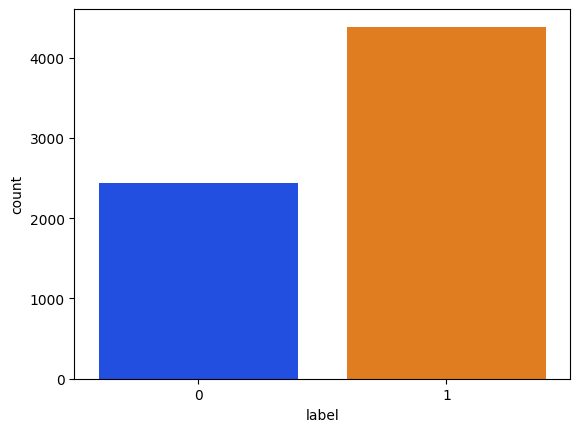

In [10]:
# Menampilkan data
sns.countplot(data=data, x='label', palette='bright')

Hasil visualisasi perbandingan data dengan label positif dan negatif, menunjukkan bahwa data posifit (1) memiliki jumlah data lebih banyak dibandingkan data negatif (0)

Data positif memiliki data sebanyak 4387, sedangkan data negatif sebanyak 2437.

Jumlah data yang ada pada kelas positif hampir 2x lebih banyak dari kelas negatif sehingga dapat dikatakan bahwa data imbalance dan condong ke arah data positif

## 4.2 Distribusi jumlah kata / karakter pada setiap reviews

In [11]:
# Menghitung jumlah karakter dan kata
data['text_len'] = data['content'].apply(len)
data['word_count'] = data['content'].apply(lambda x: len(x.split()))

data[['word_count', 'text_len']].describe()

/tmp/ipython-input-11-3186467704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_len'] = data['content'].apply(len)
/tmp/ipython-input-11-3186467704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['word_count'] = data['content'].apply(lambda x: len(x.split()))


,word_count,text_len
count,6824.000000,6824.000000
mean,9.863423,60.237691
std,13.241180,80.897117
min,0.000000,1.000000
25%,2.000000,9.000000
50%,4.000000,28.000000
75%,13.000000,77.000000
max,95.000000,500.000000


Berdasarkan deskripsi data yang ditampilkan dapat beberapa pemahaman yang dapat diambil yaitu:
1. Kalimat yang terdapat pada reviews memiliki jumlah nilai rata-rata kata sebanyak 9 kata dengan panjang 60 karakter. Artinya sebagian besar kalimat merupakan kalimat singkat.

2. Reviews terpendek hanya memiliki 1 karakter, hal ini mungkin terjadi karena pengguna memberikan review menggunakan sebuah huruf atau emoticon.

2. Terdapat kalimat yang memiliki jumlah karakter 500 dan terdiri dari 95 kata-kata. Jumlah ini cukup banyak, dapat diasumsikan kalimat yang tersebut berisi komplain pelanggan dan penjelasan kejadian yang dialami.

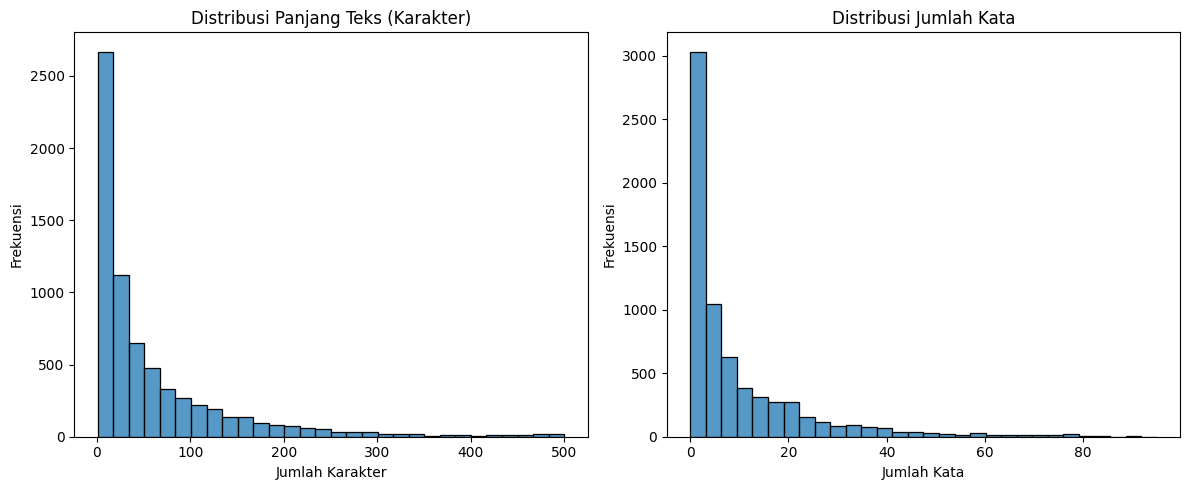

In [12]:
plt.figure(figsize=(12, 5))

# Menampilkan panjang karakter
plt.subplot(1, 2, 1)
sns.histplot(data['text_len'], bins=30)
plt.title('Distribusi Panjang Teks (Karakter)')
plt.xlabel('Jumlah Karakter')
plt.ylabel('Frekuensi')

# Menampilkan jumlah kata
plt.subplot(1, 2, 2)
sns.histplot(data['word_count'], bins=30)
plt.title('Distribusi Jumlah Kata')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi data histogram dapat diambil beberapa poin penting yaitu:
1. Distribusi data berpusat di kiri dan memanjang ke kanan. Hal ini menandakan data right skewed, terdapat beberapa outlier yang memiliki nilai atau jumlah kata-kata lebih banyak dari reviews lainnya.
2. Sebagian besar reviews merupakan kalimat pendek, hal tersebut dapat dilihat dari jumlah frekuensi data yang terpusat pada bins dengan nilai rendah (<20 kata)

## 4.3 Wordcloud

Word cloud adalah kumpulan kata-kata yang divisualisasikan dengan bentuk dan ukuran yang berbeda-beda sesuai dengan frekuensi atau kepentingan kata tersebut di dalam dataset.

Sebelum membuat wordcloud kalimat reviews perlu dirubah menjadi token yang berupa kata. Hal ini bertujuan agar wordcloud dapat menghitung frekuensi atau jumlah kemunculan setiap kata pada dataset. Proses tokenization dilakukan menggunakan bantuan library nltk

In [13]:
# Tokenization
def tokenizingText(text):
    """
    Fungsi untuk memecah teks menjadi daftar kata atau token.

    Params:
    Text(string) : Text yang ingin dirubah menjadi token
    """
    text = word_tokenize(text)
    return text

data['token'] = data['content'].apply(tokenizingText)

/tmp/ipython-input-13-3103853565.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['token'] = data['content'].apply(tokenizingText)


In [14]:
# Fungsi untuk membuat word cloud
def generate_wordcloud(data, column_name, title):
    """
    Fungsi untuk membuat Word Cloud dari teks di kolom yang ditentukan.

    Params:
    - data (pd.DataFrame): DataFrame berisi teks yang ingin ditampilkan.
    - column_name (str): Nama kolom dalam DataFrame yang berisi teks yang akan digunakan untuk Word Cloud.
    - title (str): Judul Word Cloud yang ingin ditampilkan.
    """
    # Menggabungkan semua kata dalam kolom yang diberikan menjadi satu string
    list_words = ' '.join([' '.join(tweet) for tweet in data[column_name]])

    # Membuat Word Cloud
    wordcloud = WordCloud(width=800, height=600, background_color='white', random_state=32, min_font_size=10).generate(list_words)

    # Menampilkan Plot Word Cloud
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_title(title, fontsize=18)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    plt.show()

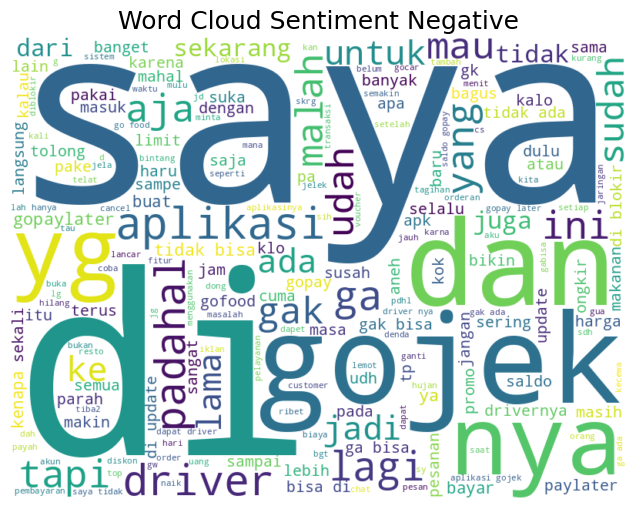

In [15]:
#Menampilkan wordcloud sentiment negative
generate_wordcloud(data[data['label']==0], 'token', 'Word Cloud Sentiment Negative')

Berdasarkan word cloud yang ditampilkan berdasarkan data sentimen negatif informasi yang dapat diambil yaitu:

1. Kata-kata yang paling sering muncul adalah 'saya', 'di', 'gojek', 'aplikasi', dll.
2. Kata 'saya' banyak muncul menandakan bahwa sebagian besar reviews diberikan atau dialami oleh pengguna itu sendiri.
3. Banyak kata hubung seperti 'di', 'ke', 'yang' digunakan dalam reviews. Kata-kata ini termasuk stopwords atau karakter yang tidak memiliki makna sebenarnya sehingga nantinya akan dihilangkan.
4. Terdapat banyak kata-kata singkatan seperti 'yg', 'ga', 'lg', dll.

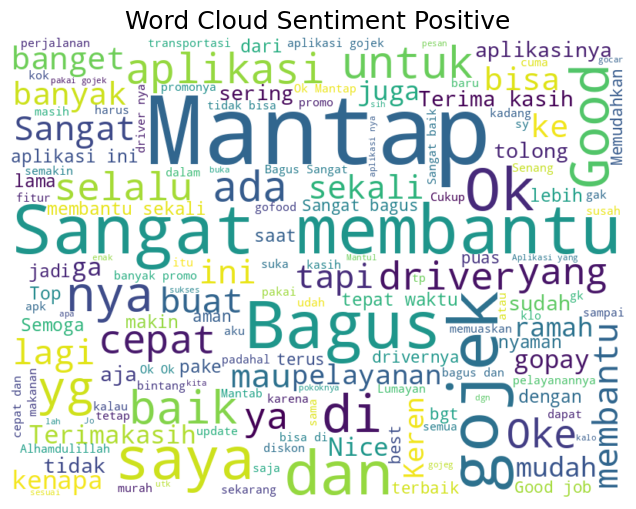

In [16]:
# Menampilkan word cloud sentiment positif
generate_wordcloud(data[data['label']==1], 'token', 'Word Cloud Sentiment Positive')

Berdasarkan word cloud yang ditampilkan berdasarkan data sentimen positif informasi yang dapat diambil yaitu:

1. Kata-kata yang paling sering muncul adalah 'mantap', 'bagus', 'baik', 'good', dll.
2. Sebagian besar kata-kata yang muncul merupakan kata sifat yang menandakan respon puas pelanggan terhadap aplikasi
3. Dalam wordcloud tersebut juga banyak stopwords dan kata-kata singkatan.

# V. Text Preprocessing

Tahap text preprocessing merupakan tahapan untuk membersihkan text agar menjadi kata baku

## 5.1 Text Cleaning

Text cleaning dilakukan untuk membersihkan text dari angka atau karakter yang tidak diperlukan.

In [17]:
def cleaningText(text):
    """
    Fungsi untuk membersihkan teks dari elemen yang tidak diinginkan

    Params:
    Text(String): Teks yang ingin dibersihkan
    """
    text = re.sub(r'\d+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
    text = re.sub(r'\b(\w+)-\1\b', r'\1', text) # menhapus kata ulang
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus spasi / whitespaces
    return text

data['clean_text']= data['content'].apply(lambda x: cleaningText(x))

/tmp/ipython-input-17-2371175460.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text']= data['content'].apply(lambda x: cleaningText(x))


## 5.2 Text CaseFolding

Text Case Folding dilakukan untuk mengubah seluruh teks menjadi huruf kecil (lowercase)

In [18]:
def casefolding(text):
    """
    Fungsi untuk mengubah semua karakter dalam teks menjadi huruf kecil

    Params:
    Text(String): Teks yang ingin dirubah
    """
    text = text.lower()
    return text

data['clean_text']= data['clean_text'].apply(casefolding)

/tmp/ipython-input-18-2136091729.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text']= data['clean_text'].apply(casefolding)


## 5.3 Tokenization

Tokenisasi adalah proses memecahkankan text yang berupa kalimat menjadi menjadi bagian-bagian kecil seperti kata/ karakter yang disebut dengan token.
Tokenisasi dilakukan menggunakan library nltk

In [19]:
 # Tokenization
data['token'] = data['clean_text'].apply(tokenizingText)

/tmp/ipython-input-19-3629732484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['token'] = data['clean_text'].apply(tokenizingText)


## 5.4 Slangwords

Slangwords adalah kata-kata tidak umum yang sering digunakan dalam berkomunikasi. Slangwords biasanya memiliki pola yang berbeda tergantung individu atau kalangan masyarakat yang menggunakannya sehingga tidak terdapat kamus atau arti bahasa yang pasti.

Untuk mengelola slangwords digunakan file yang terdapat pada repository [github](https://github.com/pujoprasetyo/NLP-Resource/blob/main/slangwords.txt).

File tersebut digunakan sebagai pembanding untuk mendeteksi slangwords dan merubahnya menjadi bahasa baku

In [20]:
# Memuat file slangwords
with open('slangwords.txt', 'r', encoding='utf-8') as f:
    slangwords = json.load(f)

In [21]:
def normalisasi(text):
    """
    Fungsi untuk melakukan normalisasi teks
    Jika kata termasuk dalam slangwords ganti menjadi kata baku

    Params:
    Text(String): Teks yang ingin dibersihkan
    """
    formal = []
    for word in text:
        if word in slangwords:
            formal.append(slangwords[word])
        else:
            formal.append(word)
    text = formal
    return text

data['token']= data['token'].apply(normalisasi)

/tmp/ipython-input-21-2853795652.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['token']= data['token'].apply(normalisasi)


In [22]:
data[data['token'].apply(lambda tokens: 'gk' in tokens)]

,userName,content,score,at,appVersion,label,text_len,word_count,token,clean_text


## 5.4 Text Filtering

Text filtering dilakukan untuk menghilangkan stopwords yang ada dalam teks. Stopwords adalah karakter atau kata-kata yang tidak memiliki makna sebenarnya, jika stopwords tidak dihilangkan maka akan menjadi noise yang dapat menggangu performa model.


Stopword yang digunakan adalah gabungan dari stopword indonesia dan english karena terdapat banyak kata serapan atau selingan dalam bahasa inggris dalam teks reviews

In [23]:
# Text Filtering
def filteringText(text):
    """
    Fungsi untuk menghilangkan stopwords yang ada dalam teks
    Jika teks terdapat dalam stopwords maka akan dihilangkan

    Params:
    Text(String): Teks yang ingin dibersihkan
    """
    stop_words_id = stopwords.words("indonesian")
    stop_words_en = stopwords.words("english")
    stop_words = stop_words_en + stop_words_id
    stop_words = list(set(stop_words))

    filtered = []
    for word in text:
        if word not in stop_words:
            filtered.append(word)
    text = filtered
    return text

data['token']= data['token'].apply(filteringText)

/tmp/ipython-input-23-35453375.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['token']= data['token'].apply(filteringText)


## 5.5 Stemming

Stemming adalah proses untuk menghapus imbuhan yang terdapat pada sebuah karakter/kata sehingga kata tersebut menjadi baku.

Stemming dilakukan menggunakan library sastrawi

In [24]:
# Text Stemming
def stemmingText(text):
    """
    Fungsi untuk melakukan steamming

    Params:
    Text(String): Teks yang ingin dibersihkan
    """
    stemmer = StemmerFactory().create_stemmer()

    # Menerapkan stemming pada setiap kata dalam daftar
    tokens = [stemmer.stem(word) for word in text]

    return tokens

data['token']= data['token'].apply(stemmingText)

/tmp/ipython-input-24-2474679643.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['token']= data['token'].apply(stemmingText)


## 5.6 Concate Text

Setelah text pre-processing dilakukan, teks yang telah menjadi token disatukan kembali menjadi sebuah kalimat yang sudah bersih dan siap digunakan sebagai feature

In [25]:
# Menggabungkan token menjadi clean_text
def fullText(tokens):
  sentence = text = ' '.join(tokens)
  return sentence

data['clean_text'] = data['token'].apply(fullText)

/tmp/ipython-input-25-3556183215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'] = data['token'].apply(fullText)


In [26]:
data

,userName,content,score,at,appVersion,label,text_len,word_count,token,clean_text
21,Hanifa Nabila L,Sekarang go food ngga pernah ada promo ongkirn...,3,2024-01-21 08:33:28,4.9.3,0,64,11,"[go, food, promo, ongkirnya, mahal]",go food promo ongkirnya mahal
133,Abu karim aljabbar Mkatiksaidi,Ramah banget,5,2024-02-01 08:57:09,4.82.1,1,12,2,"[ramah, banget]",ramah banget
134,Fathan Mubina,Setelah update kok nggak bisa dibuka,4,2024-01-31 15:20:04,4.82.1,1,36,6,"[update, buka]",update buka
135,Nyauw Jin Fie,Good,5,2024-02-01 12:51:53,4.82.1,1,4,1,[good],good
136,Tanaka Kun,Good,5,2024-02-01 04:58:30,4.82.1,1,4,1,[good],good
...,...,...,...,...,...,...,...,...,...,...
224615,Pengguna Google,Lagilagi kenapa paylater ngak bisa lagi dipaka...,5,2024-01-03 07:31:12,4.10.3,1,77,13,"[lagilagi, paylater, pakai, bayar, coda, pay, ...",lagilagi paylater pakai bayar coda pay game
224811,Budi family,kenapa map goride setiap dekat tol pasti di ar...,1,2024-01-07 15:40:43,4.10.3,0,98,17,"[map, goride, tol, arah, tol, tarif, sesuai, t...",map goride tol arah tol tarif sesuai terima kasih
224852,Musadul Wifaq,Makanan keburu dingin karena terlalu lama menu...,1,2024-01-30 11:05:38,4.10.3,0,101,15,"[makan, lanjur, dingin, tunggu, ongkos kirim, ...",makan lanjur dingin tunggu ongkos kirim pakai ...
224906,syed abdullah almunawwar,Maksa banget suruh download ssih,1,2024-01-18 15:06:07,4.1.1,0,32,5,"[maksa, banget, suruh, download, sih]",maksa banget suruh download sih


## 5.7 EDA After Pre-processing

Setelah text preprocesssing selesai, dilakukan proses ekplorasi data kembali untuk melihat hasil perubahan dan memastikan bahwa data sudah bersih.

### Distribusi jumlah kalimat / karakter reviews

In [27]:
# Menghitung jumlah karakter dan kata
data['text_len'] = data['clean_text'].apply(len)
data['word_count'] = data['clean_text'].apply(lambda x: len(x.split()))

data[['word_count', 'text_len']].describe()

/tmp/ipython-input-27-4129452438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_len'] = data['clean_text'].apply(len)
/tmp/ipython-input-27-4129452438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['word_count'] = data['clean_text'].apply(lambda x: len(x.split()))


,word_count,text_len
count,6824.000000,6824.000000
mean,5.671747,35.480657
std,7.097350,45.645974
min,0.000000,0.000000
25%,1.000000,6.000000
50%,3.000000,17.000000
75%,7.000000,46.000000
max,55.000000,331.000000


Berdasarkan Hasil deskripsi data setelah dilakukan text preprocessing terdapat beberapa perubahan sebagai berikut:
1. Jumlah rata-rata kata dan panjang kalimat setelah dilakukan cleaning menurun, rata-rata kata yang awalnya berjumlah 9 kata setiap kalimat menjadi 5 kata. Sedangkan panjang kalimat yang semula rata-ratanya 60 karakter menjadi 35 karakter.

2. Jumlah karakter dan kata-kata pada reviews terpanjan juga menurun menjadi 55 kata dan 331 karakter.

3. Sebagian besar teks reviews sekarang hanya memiliki kurang dari 10 karakter/kata

### Cloudwords

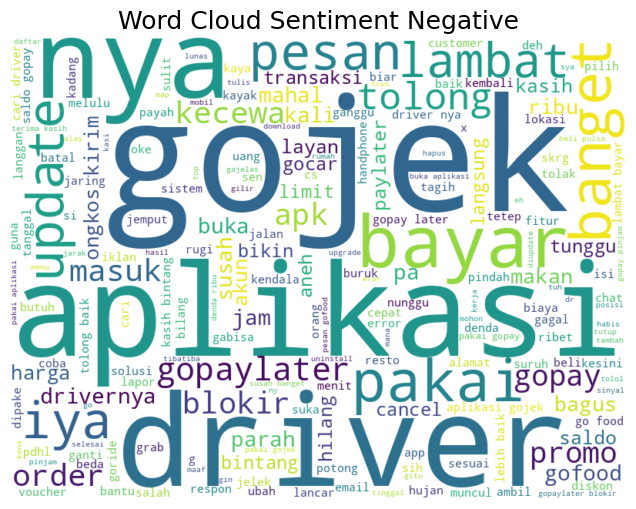

In [28]:
#Menampilkan wordcloud sentiment negative
generate_wordcloud(data[data['label']==0], 'token', 'Word Cloud Sentiment Negative')

Berdasarkan visualisasi cloudword yang ditampilkan, kumpulan kata atau token yang ada sekarang terdiri dari kata-kata baku. Tidak terlihat lagi adanya kata-kata singkatan. Kata-kata yang paling banyak digunakan adalah 'gojek', 'aplikasi', dan 'driver'

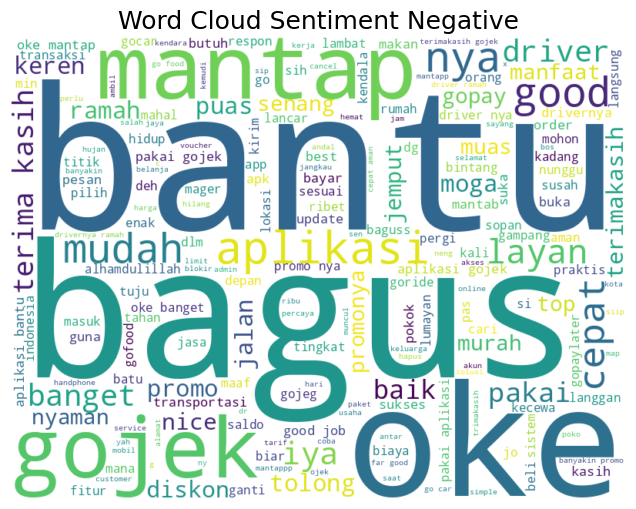

In [29]:
#Menampilkan wordcloud sentiment negative
generate_wordcloud(data[data['label']==1], 'token', 'Word Cloud Sentiment Negative')

Pada cloudword sentiment positif token yang ada juga telah menjadi kata-kata baku. Kata-kata yang paling banyak digunakan adalah 'bantu', 'bagus', dan 'oke'

# VI. Feature Engineering

Pada proses feature engineering dilakukan pengolahan data menjadi data target dan data feature yang akan digunakan sebagai data training

## 6.1 Feature Creation

Pada bagian ini dilakukan pembagian data menjadi beberapa bagian yaitu test set size 20% dan train set 80%. Setelah itu train set dibagi kembali menjadi train set sebesar 75% dan val set 15%.

In [30]:
# Data Splitting

X_train_val, X_test, y_train_val, y_test = train_test_split(data.clean_text,
                                                    data.label,
                                                    test_size=0.2,
                                                    random_state=32,
                                                    stratify=data.label)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.15,
                                                  random_state=32,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (4640,)
Val Size   :  (819,)
Test Size  :  (1365,)


Setelah dilakukan data splitting diperoleh train data sebanyak 4640 data, val data 819, dan test data 1365

## 6.2 Vectorization

Vectorization adalah proses merubah data menjadi bentuk vector

In [31]:
# Menghitung jumlah vocabulary
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<4640x4570 sparse matrix of type '<class 'numpy.int64'>'
	with 23950 stored elements in Compressed Sparse Row format>

Panjang matrix yang dibuat dengan data train adalah 4640x4570 dimana matrix menyimpan sebanyak 23950 elemen

In [32]:
# Mencari jumlah vocabulary dan panjang token

total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  4570
Maximum Sentence Length :  55 tokens


Jumlah vocabulary atau karakter/kata yang terdapat pada data adalah 4570 dengan nilai token terpanjang 55

Selanjutnya dibuat model TextVectorization berdasarkan jumlah vocab dan token yang sudah ditemukan

In [33]:
# Text Vectorization
text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)) # Only use in Sequential API

text_vectorization.adapt(X_train)

## 6.3 Embedding

Embedding merupakan proses untuk mengubah data menjadi numerik untuk memahami makna data tersebut. Proses embedding dilakukan menggunakan library word2vec

In [34]:
# Membuat model word2vec
w2v_model = Word2Vec(
    sentences=data.token,
    vector_size=100,
    window=5,
    min_count=1,
    workers=4,
    sg=1
)

In [35]:
# Membuat embedding matrix
embedding_dim = 100
embedding_matrix = np.zeros((total_vocab, embedding_dim))

# Mengambil data vocabulary
vocab = text_vectorization.get_vocabulary()
word_index = dict(zip(vocab, range(len(vocab))))

In [36]:
# Menghitung nilai words
for word, i in word_index.items():
    """
    Perulangan untuk menghitung bobot setiap words
    Jika word ada dalam list tambahkan nilai yang ada
    Jika tidak buat nilai baru
    """
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
    else:
        embedding_matrix[i] = np.random.normal(size=(embedding_dim,))

In [37]:
# Membuat model embedding yang akan digunakan dalam model machine learning
embedding = Embedding(
    input_dim=len(vocab),
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=max_sen_len
)

In [38]:
# Contoh hasil data vector yang diolah
print('Contoh teks')
print(X_train.iloc[1])
print('')

print('Hasil Vectorization')
print(text_vectorization(X_train.iloc[1]))
print('Vector size : ', text_vectorization(X_train.iloc[1]).shape)

## Hasil  Embedding
print('Hasil  Embedding')
print(embedding(text_vectorization(X_train.iloc[1])))
print('Vector size : ', embedding(text_vectorization(X_train.iloc[1])).shape)

Contoh teks
apk bagus bantu

Hasil Vectorization
tf.Tensor(
[33  7  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0], shape=(55,), dtype=int64)
Vector size :  (55,)
Hasil  Embedding
tf.Tensor(
[[-0.035561    0.19630167  0.04443227 ... -0.09207158  0.01540571
  -0.06309772]
 [-0.08150411  0.23357989  0.03111105 ... -0.09946025  0.02462711
  -0.02592455]
 [-0.07319862  0.22341259  0.01849745 ... -0.08192316  0.02074168
  -0.01207254]
 ...
 [ 1.3950014   0.40702873  0.33736187 ... -2.60672     1.029
   0.61499536]
 [ 1.3950014   0.40702873  0.33736187 ... -2.60672     1.029
   0.61499536]
 [ 1.3950014   0.40702873  0.33736187 ... -2.60672     1.029
   0.61499536]], shape=(55, 100), dtype=float32)
Vector size :  (55, 100)


Setelah dilakukan proses embedding teks akan berubah menjadi nilai vector yang dapat digunakan untuk prediksi nilai secara matematis. \
Pada contoh teks diatas data berubah menjadi vector dengan jumlah token 55 yang menyimpan 100 elemen

# VII. Model

Model machine learning yang dibuat pada project ini menggunakan algoritma Artificial Neural Networks (ANN)

## 7.1 Model Definition

Pada percobaan pertama neuron yang digunakan berjenis LTSM (Long Short Term Memory). Penggunaan LTSM dikarenakan model neuron ini mampu menyimpan data penting dari proses sebelumnya. Pada kasus nlp yang memiliki jumlah token cukup banyak model ini dapat menjaga informasi penting agar tidak hilang (vanishing gradient)

In [39]:
# Model LTSM
## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Membuat arsitektur model
model_lstm_1 = Sequential()
model_lstm_1.add(text_vectorization)
model_lstm_1.add(embedding)

# Hidden Layer LTSM
model_lstm_1.add(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm_1.add(Dropout(0.3))
model_lstm_1.add(LSTM(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm_1.add(Dropout(0.3))

# Output Layer
model_lstm_1.add(Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))

model_lstm_1.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model_lstm_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 55)                0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 55, 100)           457000    
                                                                 
 lstm (LSTM)                 (None, 55, 32)            17024     
                                                                 
 dropout (Dropout)           (None, 55, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                        

Penjelasan model arsitektur model ANN yang dibuat adalah sebagai berikut:
- Model memiliki 7 layer yang terdiri dari 2 layer input, 4 hidden layer dan 1 output layer
- Pada Input layer terdapat proses text preprocessing yaitu vectorization dan embedding
- Pada Hidden Layer terdapat LTSM layer yang memiliki jumlah neuron 32 dan 16
- Di antara hidden layer terdapat 2 dropout layer yang berfungsi mematikan sebagian fungsi neuron agar model tidak tergantung pada sebuah data tertentu
- Di akhir terdapat output layer dengan activation function sigmoid dan loss function binary crossentropy, parameter tersebut digunakan karena target output bertipe data binear

## 7.2 Model Training

Pada tahap model traning dilakukan pelatihan model machine learning yang telah dibuat. Jumlah epoch yang digunakan adalah 20 yang berarti train dilakukan berulang kali sebanyak 20 kali.

In [40]:
# Train model
%%time
model_lstm_1_hist = model_lstm_1.fit(X_train, y_train,
                                     epochs=20,
                                     validation_data=(X_val, y_val))

Epoch 1/20
145/145 [==============================] - 12s 56ms/step - loss: 0.6418 - accuracy: 0.6481 - val_loss: 0.4968 - val_accuracy: 0.7998
Epoch 2/20
145/145 [==============================] - 6s 43ms/step - loss: 0.4087 - accuracy: 0.8442 - val_loss: 0.3283 - val_accuracy: 0.8694
Epoch 3/20
145/145 [==============================] - 7s 49ms/step - loss: 0.2982 - accuracy: 0.8998 - val_loss: 0.3170 - val_accuracy: 0.8791
Epoch 4/20
145/145 [==============================] - 6s 42ms/step - loss: 0.2461 - accuracy: 0.9226 - val_loss: 0.3601 - val_accuracy: 0.8535
Epoch 5/20
145/145 [==============================] - 7s 49ms/step - loss: 0.2168 - accuracy: 0.9366 - val_loss: 0.3825 - val_accuracy: 0.8535
Epoch 6/20
145/145 [==============================] - 6s 43ms/step - loss: 0.1862 - accuracy: 0.9472 - val_loss: 0.4022 - val_accuracy: 0.8462
Epoch 7/20
145/145 [==============================] - 7s 50ms/step - loss: 0.1631 - accuracy: 0.9569 - val_loss: 0.4090 - val_accuracy: 0.842

In [42]:
# Predict test-set

y_pred_train = model_lstm_1.predict(X_train)
y_pred_test = model_lstm_1.predict(X_test)
y_pred_train

43/43 [==============================] - 1s 10ms/step


array([[0.99218893],
       [0.9892621 ],
       [0.9924975 ],
       ...,
       [0.9925148 ],
       [0.9892496 ],
       [0.992732  ]], dtype=float32)

## 7.3 Model Evaluation

Tahap evaluasi dilakukan untuk menilai performa model yang telah dibuat. Matrics evaluasi yang digunakan antara lain histogram, cunfosion matrics, dan f1 score.

F1 score digunakan karena hasil prediksi terhadap False Negative dan False Positive dianggap sama pentingnya.

Dampak FN:
- Rating aplikasi menjadi turun
- Tenaga terbuang karena harus menganalisis reviews negatif yang ternyata positif

Dampak FP:
- Kritik & saran menjadi tidak terbaca
- Pengguna bisa beralih ke kompetitor lain

#### Accuracy & Loss Graph

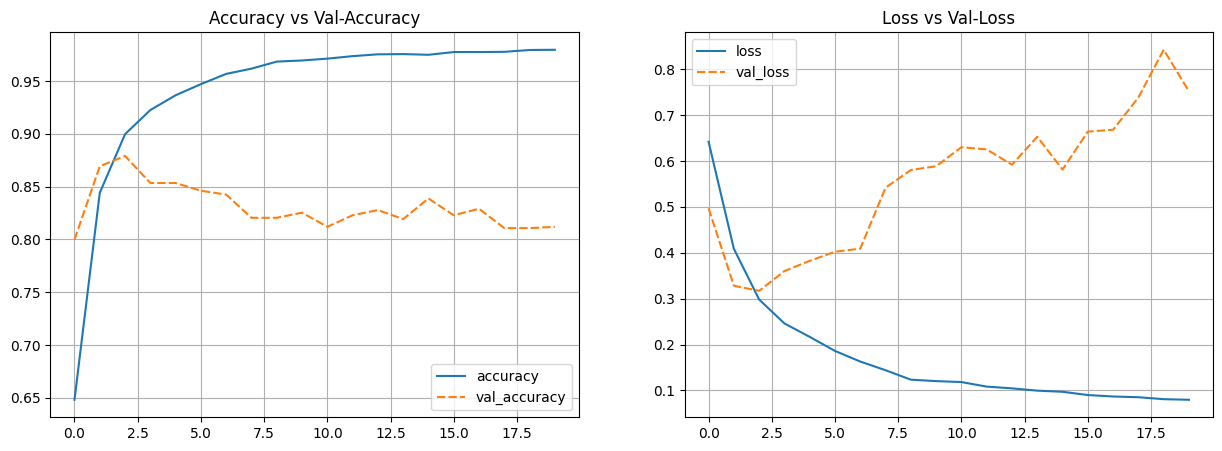

In [41]:
# Visualisasi perfoma model

model_lstm_1_hist_df = pd.DataFrame(model_lstm_1_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Berdasarkan hasil histogram diatas informasi yang didapatkan adalah sebagai berikut:
1. Nilai rata-rata akurasi untuk train set terus mengalami peningkatan saat training hingga melebihi 95%. Sedangkan pada valset performa menunjukkan peningkatan di awal training kemudian menurun hingga menunjukkan stagnansi di angka sekitar 80%
2. Value loss pada data training juga mendapatkan performa yang baik saat training hingga mendapatkan nilai loss dibawah 1%. Namun pada val set nilai loss hanya menunjukkan penurunan di awal selanjutnya malah semakin naik.
3. Berdasarkan performa model yang ditampilkan histogram diatas performa model dapat dikatakan **overfit** karena perbandingan nilai antara train dan val cukup jauh, bahkan akan cenderung semakin tinggi perbedaannya jika ditambahkan waktu training

#### Confusion Matrix

In [43]:
# Mengkonversi nilai prediksi menjadi binear
y_pred_train = np.where(y_pred_train >= 0.5, 1, 0)
y_pred_test = np.where(y_pred_test >= 0.5, 1, 0)

# Membuat confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print('Confusion Matrix train: \n', cm_train)
print('Confusion Matrix test: \n', cm_test)

Confusion Matrix train: 
 [[1591   66]
 [  18 2965]]
Confusion Matrix test: 
 [[381 106]
 [151 727]]


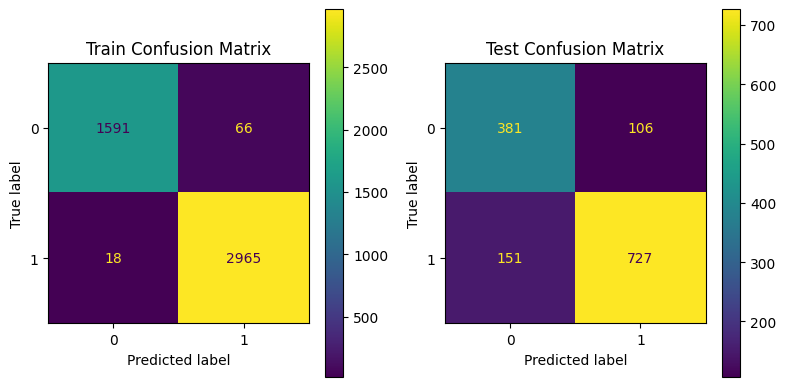

In [44]:
#Membuat visualisasi confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot confusion matrix train
ConfusionMatrixDisplay(cm_train).plot(ax=axes[0])
axes[0].set_title('Train Confusion Matrix')

# Plot confusion matrix test
ConfusionMatrixDisplay(cm_test).plot(ax=axes[1])
axes[1].set_title('Test Confusion Matrix')

plt.tight_layout()
plt.show()

Berdasarkan nilai confusion matrix yang diperoleh, performa model sangat baik pada train set namun kurang di val set.

Pada train set jumlah FP sebanyak 66 dan FN 18 \
Pada val set jumlah FP sebanyak 106 dan FN 151

#### F1 Score

In [45]:
# Model evaluation

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1657
           1       0.98      0.99      0.99      2983

    accuracy                           0.98      4640
   macro avg       0.98      0.98      0.98      4640
weighted avg       0.98      0.98      0.98      4640



In [46]:
# Model evaluation
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       487
           1       0.87      0.83      0.85       878

    accuracy                           0.81      1365
   macro avg       0.79      0.81      0.80      1365
weighted avg       0.82      0.81      0.81      1365



Berdasarkan tabel clasification report hasil evaluasi yang diperoleh adalah sebagai berikut:

1. F1 score pada train set menunjukkan nilai 0.97 pada kelas 0 dan 0.99 pada kelas 1. Performa pada train set menunjukkan performa yang sangat baik
2. F1 score pada test set menunjukkan nilai 0.75 pada kelas 0 dan 0.85 pada kelas 1. Terdapat perbedaan nilai yang cukup banyak pada score evaluasi hal ini dapat disebabkan karena terjadi data imbalance antara nilai 0 dan 1 pada test set.
3. Berdasarkan perbandingan nilai f1 pada train dan test, performa model menunjukkan indikasi overfit karena perbedaan nilai yang cukup tinggi

#### Evaluation Summary

Berdasarkan hasil evaluasi seluruh matrix evaluasi yang diperoleh :
- Model menunjukkan perfoma yang tinggi di seluruh matrix evaluasi
- Terdapat perbedaan yang cukup tinggi pada hasil evaluasi train dan test, sehingga model terindikasi **over-fit**
- Overfit terjadi kemungkinan karena data test memiliki banyak data yang berbeda dengan data train, sehingga hasil embedding data yang dilakukan pada data test tidak dapat mengenali data yang ada di data train.
- Untuk perbaikan selanjutnya dapat dicoba dengan melakukan proses transfer learning yang memiliki model data lebih banyak

Catatan:
- Model ini sebenarnya sudah dapat digunakan, namun performa model pada test set masih kurang memuaskan.
- Konsistensi model yang kurang baik dapat menyebabkan terjadinya kesalahan prediksi pada data baru. Sehingga jika model ini diterapkan perusahaan dapat mengalami kerugian karena alokasi resource yang salah karena kesalahan hasil prediksi

# VIII. Model Improvement

Pada model improvement model ANN dikembangkan kembali berdasarkan hasil evaluasi yang didapatkan untuk mendapatkan model yang lebih baik

## 8.1 Model Definition

Pertama perubahan dilakukan pada metode embedding layer yang digunakan. Pada model ini proses embedding dilakukan menggunakan transfer learning dengan model yang berasal dari kaggle yang berjudul nnlm versi Bahasa Indonesia

In [47]:
# Download the Embedding Layer

url = 'https://www.kaggle.com/models/google/nnlm/tensorFlow2/tf2-preview-id-dim128-with-normalization/1'

hub_layer = tf_hub.KerasLayer(url, output_shape=[128], input_shape=[], dtype=tf.string)

Selanjutnya dilakukan penambahan layer ltsm dan mengganti metode pembelajaran pada seluruh ltsm layer menjadi bidirectional, sehingga proses pembelajaran dapat dilakukan secara dua arah (maju, mundur).

Kemudian ntuk mengurangi kecenderungan pada suatu data/neuron dropout dinaikkan menjadi 0.5

In [48]:
# Model LTSM 2
## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Membuat arsitektur model
model_lstm_2 = Sequential()
model_lstm_2.add(hub_layer)
model_lstm_2.add(Reshape((128, 1)))

# Hidden Layer LTSM
model_lstm_2.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(Dropout(0.5))
model_lstm_2.add(Bidirectional(LSTM(16, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(Dropout(0.5))
model_lstm_2.add(Bidirectional(LSTM(8, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(Dropout(0.5))

# Output Layer
model_lstm_2.add(Dense(1, activation='sigmoid',
                       kernel_initializer=tf.keras.initializers.GlorotNormal(seed)
                      ))
model_lstm_2.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model_lstm_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 128)               112461824 
                                                                 
 reshape (Reshape)           (None, 128, 1)            0         
                                                                 
 bidirectional (Bidirection  (None, 128, 64)           8704      
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 128, 64)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 128, 32)           10368     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 128, 32)           0

Penjelasan arsitektur improvement model ANN yang dibuat adalah sebagai berikut:

- Model memiliki 9 layer yang terdiri dari 2 layer input, 6 hidden layer dan 1 output layer
- Pada input layer dilakukan preprocessing teks menggunakan tensorflow hub
- Pada Hidden Layer terdapat 3 LTSM layer yang memiliki jumlah neuron 32, 16 dan 8
- Di antara hidden layer terdapat 3 dropout layer yang berfungsi mematikan sebagian fungsi neuron agar model tidak tergantung pada sebuah data tertentu
- Pada output layer tidak ada perubahan

## 8.2 Model Training

Pada model training ditambahkan parameter early stop dan reduce learning rate.
Early stop digunakan untuk menghentikan proses training jika performa model menurun atau mengalamai stagnansi.
Learning rate digunakan untuk mengatur kecepatan belajar machine learning.

In [49]:
%%time
early_stop = EarlyStopping(monitor='val_loss',
                           patience=5,
                           restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=5, min_lr=1e-6)

model_lstm_2_hist = model_lstm_2.fit(X_train, y_train,
                                     epochs=50,
                                     validation_data=(X_val, y_val),
                                     callbacks=[early_stop, reduce_lr])

Epoch 1/50
145/145 [==============================] - 35s 182ms/step - loss: 0.6534 - accuracy: 0.6403 - val_loss: 0.6205 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 2/50
145/145 [==============================] - 26s 183ms/step - loss: 0.6138 - accuracy: 0.6849 - val_loss: 0.5885 - val_accuracy: 0.6947 - lr: 0.0010
Epoch 3/50
145/145 [==============================] - 27s 188ms/step - loss: 0.5840 - accuracy: 0.7129 - val_loss: 0.5701 - val_accuracy: 0.7118 - lr: 0.0010
Epoch 4/50
145/145 [==============================] - 32s 217ms/step - loss: 0.5717 - accuracy: 0.7233 - val_loss: 0.5427 - val_accuracy: 0.7399 - lr: 0.0010
Epoch 5/50
145/145 [==============================] - 28s 191ms/step - loss: 0.5555 - accuracy: 0.7280 - val_loss: 0.5401 - val_accuracy: 0.7289 - lr: 0.0010
Epoch 6/50
145/145 [==============================] - 24s 166ms/step - loss: 0.5428 - accuracy: 0.7420 - val_loss: 0.5273 - val_accuracy: 0.7350 - lr: 0.0010
Epoch 7/50
145/145 [==============================] 

In [51]:
# Predict test-set

y_pred_train2 = model_lstm_2.predict(X_train)
y_pred_test2 = model_lstm_2.predict(X_test)
y_pred_train2

43/43 [==============================] - 5s 39ms/step


array([[0.43115836],
       [0.5497707 ],
       [0.7456708 ],
       ...,
       [0.97319543],
       [0.9163186 ],
       [0.94228125]], dtype=float32)

## 8.3 Model Evaluation

Evaluasi model dilakukan menggunakan matrix yang sama dengan model sebelumnya.

#### Accuracy & Loss Graph

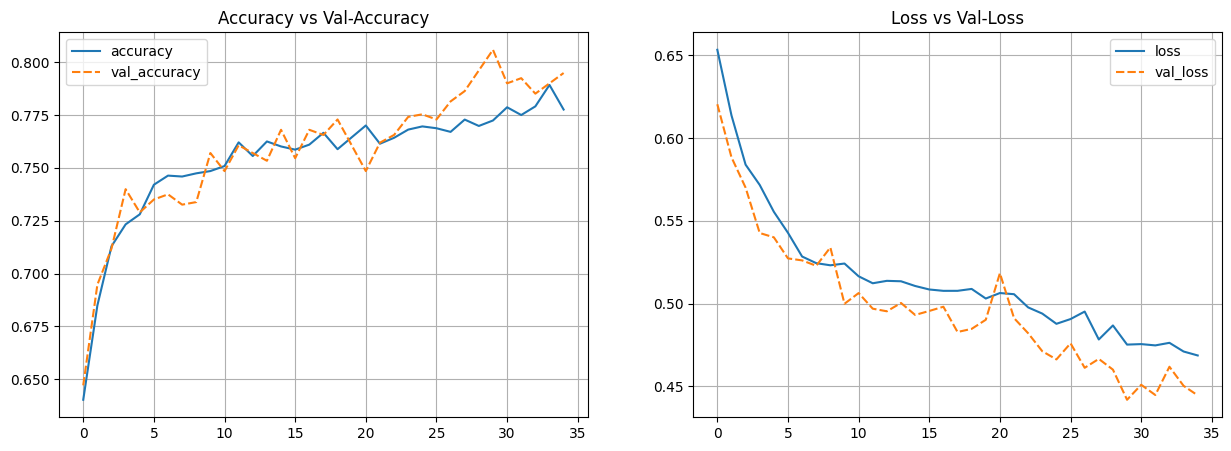

In [50]:
# Visualisasi Performa model

model_lstm_2_hist_df = pd.DataFrame(model_lstm_2_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_2_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_2_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Berdasarkan hasil histogram diatas informasi yang didapatkan adalah sebagai berikut:
1. Nilai rata-rata akurasi untuk train dan val set terus mengalami peningkatan saat training hingga mencapai puncak performanya di epoch 34. Nilai accuracy pada train dan val berhenti pada nilai sekitar 0.78
2. Value loss pada data train dan val set juga mendapatkan performa yang baik. Nilai loss pada kedua data tersebut terus mengalami penurunan hingga dibawah 0.5
3. Berdasarkan performa model yang ditampilkan histogram diatas performa model dapat dikatakan **good-fit** karena nilai antara train dan val tidak terdapat perbedaan nilai yang signifikan.

#### Confusion Matrix

In [52]:
# Mengkonversi nilai prediksi menjadi binear
y_pred_train2 = np.where(y_pred_train2 >= 0.5, 1, 0)
y_pred_test2 = np.where(y_pred_test2 >= 0.5, 1, 0)

# Membuat confusion matrix
cm_train2 = confusion_matrix(y_train, y_pred_train2)
cm_test2 = confusion_matrix(y_test, y_pred_test2)

print('Confusion Matrix train: \n', cm_train2)
print('Confusion Matrix test: \n', cm_test2)

Confusion Matrix train: 
 [[1127  530]
 [ 470 2513]]
Confusion Matrix test: 
 [[334 153]
 [113 765]]


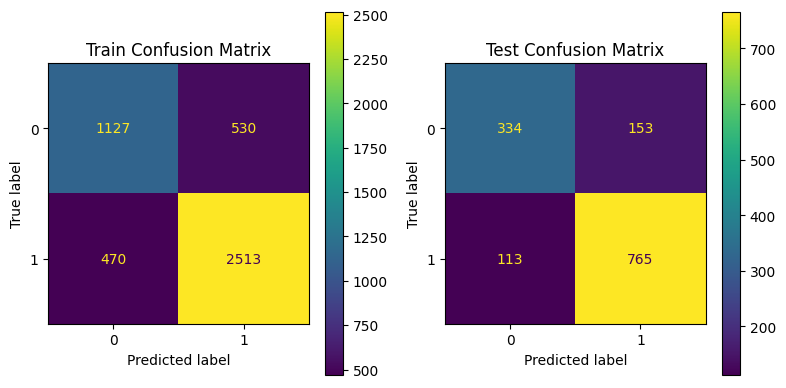

In [53]:
#Membuat visualisasi confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot confusion matrix train
ConfusionMatrixDisplay(cm_train2).plot(ax=axes[0])
axes[0].set_title('Train Confusion Matrix')

# Plot confusion matrix test
ConfusionMatrixDisplay(cm_test2).plot(ax=axes[1])
axes[1].set_title('Test Confusion Matrix')

plt.tight_layout()
plt.show()

Berdasarkan nilai confusion matrix yang diperoleh, performa model cukup baik pada train set dan val set.

- Pada train set jumlah FP sebanyak 530 dan FN 470
- Pada val set jumlah FP sebanyak 153 dan FN 113

#### F1 Score

In [54]:
# Model evaluation
print(classification_report(y_train, y_pred_train2))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69      1657
           1       0.83      0.84      0.83      2983

    accuracy                           0.78      4640
   macro avg       0.77      0.76      0.76      4640
weighted avg       0.78      0.78      0.78      4640



In [55]:
# Model evaluation
print(classification_report(y_test, y_pred_test2))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       487
           1       0.83      0.87      0.85       878

    accuracy                           0.81      1365
   macro avg       0.79      0.78      0.78      1365
weighted avg       0.80      0.81      0.80      1365



Berdasarkan tabel clasification report hasil evaluasi yang diperoleh adalah sebagai berikut:

1. F1 score pada train set menunjukkan nilai 0.69 pada kelas 0 dan 0.83 pada kelas 1. Performa pada train set menunjukkan performa yang baik
2. F1 score pada test set menunjukkan nilai 0.72 pada kelas 0 dan 0.85 pada kelas 1. Performa pada test set juga menunjukkan performa yang baik
3. Terdapat perbedaan nilai antara kelas 0 dan 1 di kedua dataset. Hal tersebut terjadi karena terdapat imbalance data pada kedua kelas tersebut, sehingga model cenderung mengarah kepada kelas 1
4. Berdasarkan perbandingan nilai f1 pada train dan test, performa model menunjukkan hasil yang konsisten sehingga model dapat dikatakan **good-fit**

#### Evaluation Summary

Berdasarkan hasil evaluasi seluruh matrix pada model improvement, diperoleh kesimpulan sebagai berikut :
- Model menunjukkan perfoma yang baik di seluruh matrix evaluasi
- Performa model menurun jika dibandingkan model pertama, namun model kedua memiliki tingkat konsistensi yang lebih tinggi
- Jika dilihat dari perbedaan arsitektur model, kemungkinan penurunan performa terjadi dikarenakan perbedaan proses embedding. Pada model pertama model embedding dilakukan secara manual menggunakan library word2vec sehingga model lebih mengenali pola dan karakter yang terdapat pada data. Sedangkan pada model kedua data dibandingkan dengan model yang lebih banyak dan baku, sehingga kesalahan yang terdeteksi menjadi lebih banyak
- Tidak terdapat perbedaan performa model pada train dan test set, sehingga model dapat dikatakan **good-fit**

Catatan:
- Model improvement memiliki tingkat konsistensi yang tinggi, bahkan pada matrix evaluasi hasil accuracy pada test set cenderung memiliki nilai lebih tinggi. Sehingga model ini dapat diterapkan karena model dapat mengenali data baru dengan sangat baik
- Kekurangan model ini jika diterapkan yaitu rawan terjadi kesalahan prediksi terhadap FN dan FP. Sehingga jika model digunakan perusahaan dapat mengalami keterlambatan dalam mendeteksi permasalahan yang dialami pelanggan, hal tersebut dapat mempengaruhi kepuasan pelanggan yang menyebabkan customer churn

## 8.4 Model Saving

Pada bagian ini dilakukan pemyimpanan model yang sudah dibuat agar dapat digunakan pada project lain

In [56]:
# Model summary
model_lstm_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 128)               112461824 
                                                                 
 reshape (Reshape)           (None, 128, 1)            0         
                                                                 
 bidirectional (Bidirection  (None, 128, 64)           8704      
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 128, 64)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 128, 32)           10368     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 128, 32)           0

Karena model menggunakan tensorflow hub maka model disimpan dalam format folder sehingga model embedding juga dapat tersimpan.

In [57]:
# Menyimpan model dengan format tf/folder
model_lstm_2.save('model_nlp', save_format='tf')

In [58]:
# Melakukan kompresi model menjadi zip
!zip -r model_nlp.zip model_nlp/

  adding: model_nlp/ (stored 0%)
  adding: model_nlp/keras_metadata.pb (deflated 93%)
  adding: model_nlp/variables/ (stored 0%)
  adding: model_nlp/variables/variables.index (deflated 68%)
  adding: model_nlp/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: model_nlp/saved_model.pb (deflated 90%)
  adding: model_nlp/assets/ (stored 0%)
  adding: model_nlp/assets/tokens.txt (deflated 51%)
  adding: model_nlp/fingerprint.pb (stored 0%)


# IX. Conclusion

Berdasarkan seluruh hasil proses analisis dan pemodelan machine learning yang telah dilakukan, diambil beberapa kesimpulan sebagai berikut:
1. Model Machine Learning
  - Pada model machine learning pertama hasil performa model yang didapatkan cukup baik namun terjadi overfit pada performa model. Hal ini dikarenakan model kurang bisa memahami pola yang terdapat pada dataset yang berbeda
  - Pada model machine learning dilakukan penambahan fitur transfer learning untuk memperbaiki model, hasilnya performa model menjadi lebih konsisten. Namun, tingkat akurasi model sedikit menurun. Hal ini terjadi karena imbalance data dan kurangnya kemampuan model memahami pola atau karakter yang terdapat pada dataset.
  - Berdasarkan hasil evaluasi tersebut perbaikan yang dapat dilakukan untuk model selanjutnya antara lain: \
    a. Memperbaiki proses pre-processing data. Data yang digunakan berasal dari reviews pelanggan, dimana sebagian besar pelanggan menggunakan kalimat yang tidak baku, sehingga model sulit memahami makna dari data tersebut. \
    b. Melakukan proses balancing data, perbedaan hasil prediksi pada kelas 0 dan 1 terjadi akibat imbalance data (EDA 1). Sehingga untuk meningkatkan performa model sebaiknya dilakukan balancing data sebelum melakukan proses training. \
    c. Membuat kamus vocabulary dan model embedding yang sesuai, sebagian besar library yang ada di internet kebanyakan menggunakan bahasa universal (en) sehingga kurang cocok digunakan untuk model NLP berbahasa indonesia. Sehingga untuk membuat model NLP yang baik perlu membuat kamus sendiri yang sesuai dengan topik permasalahan yang diangkat, namun hal ini memerlukan waktu yang cukup lama.

2. Insight bisnis

Model yang telah dibuat dapat digunakan untuk mendeteksi apakah sebuah reviews mengandung sentimen positif atau negatif, hasil prediksi tersebut selanjutnya dapat digunakan untuk menentukan strategi bisnis misalnya:
  - Segera menindak lanjuti reviews dengan sentiment negatif, hal ini harus segera dilakukan untuk mengatasi permasalahan yang dialami pelanggan, penanganan yang tepat dapat menurunkan resiko pelanggan churn.
  - Dari hasil analisis terhadap sentiment dan cloudword yang dihasilkan, perusahaan dapat melihat fokus permasalahan yang dihadapi pelanggan. Misalnya seperti kata 'driver' yang muncul pada cloudwords, hal tersebut berarti banyak pelanggan yang mengeluhkan driver yang didapatkan saat melakukan pemesanan. Perusahaan perlu melakukan investigasi terhadap driver yang bersangkutan atau memperbaiki regulasi driver. Hal ini dapat meminimalisir penggunaan resource dan meningkatkan averange respon time karena fokus pada permasalahan yang sering terjadi.
  - Hasil analisis pada sentiment positif juga dapat digunakan untuk melakukan segmentasi pelanggan, misalnya reviews positif dengan isi konten memesan makanan. Perusahaan dapat fokus memberikan promosi produk makanan pada pelanggan tersebut atau melakukan cros-selling agar pelanggan mau mencoba layanan lain yang tersedia. Hal ini dapat meminimalisir biaya marketing karena perusahaan sudah tau mana market yang sesuai.